In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Sales and Profitability Analysis

In [135]:
o1 = pd.read_csv('054D3868.csv')
o2 = pd.read_csv('A20E12A1.csv')
o3 = pd.read_csv('BE370689.csv')

In [136]:
display(o1.head())
display(o2.head())
display(o3.head())

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [137]:
display(o1.isna().sum())
display(o1.shape)
display(o2.isna().sum())
display(o2.shape)
display(o3.isna().sum())
display(o3.shape)

Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

(560, 5)

Month of Order Date    0
Category               0
Target                 0
dtype: int64

(36, 3)

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

(1500, 6)

In [138]:
o1 = o1[~o1.City.isna()]

In [139]:
o1.isna().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

***q1***

In [140]:
final_o = pd.merge(o1,o3, how='left', on='Order ID')
final_o.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


**q1 final answer**

In [141]:
category_sales = final_o.groupby('Category')['Amount'].sum().reset_index().rename(columns={'Amount': 'Total Sales'})
category_sales['Total Sales']=category_sales['Total Sales'].astype(int)
category_sales.head()

,Category,Total Sales
0,Clothing,139054
1,Electronics,165267
2,Furniture,127181


***q2***

In [142]:
group = final_o.groupby('Category').agg(
    total_profit=('Profit', 'sum'),
    total_amount=('Amount', 'sum')
).reset_index()

temp_df = final_o.groupby(['Order ID','Category'])['Profit'].sum().reset_index()
temp_df = temp_df.groupby('Category')['Profit'].mean().reset_index()

display(group.head())
display(temp_df.head())

,Category,total_profit,total_amount
0,Clothing,11163.0,139054.0
1,Electronics,10494.0,165267.0
2,Furniture,2298.0,127181.0


,Category,Profit
0,Clothing,28.404580
1,Electronics,51.441176
2,Furniture,12.354839


In [143]:
final_df = pd.merge(group,temp_df, how='left',on='Category')
final_df.rename({'Profit':'avg_profit_per_order'},inplace=True, axis=1)
final_df.head()

,Category,total_profit,total_amount,avg_profit_per_order
0,Clothing,11163.0,139054.0,28.404580
1,Electronics,10494.0,165267.0,51.441176
2,Furniture,2298.0,127181.0,12.354839


In [144]:
final_df['total_profit_mergin'] = (final_df['total_profit'] / final_df['total_amount'])*100

**q2 final answer**

In [145]:
final_df[['Category','avg_profit_per_order','total_profit_mergin']]

,Category,avg_profit_per_order,total_profit_mergin
0,Clothing,28.404580,8.027817
1,Electronics,51.441176,6.349725
2,Furniture,12.354839,1.806874


<h3>I think amount is the net profit and from that perspective I use the formula for total_profit_mergin<h3/>

***q3***

<h2>based on above metrix I get below information<h2/>

**q3 final answer**

### ✅ Category Ranking

**From highest to lowest average profit per order:**
- **Electronics → Clothing → Furniture**

**From highest to lowest total profit margin:**
- **Clothing → Electronics → Furniture**

### 📉 Underperforming Category: `Furniture`

- **Possible Reasons:**
  - High logistics/shipping costs eating into profit
  - Returns or damages reducing profitability

### 📈 Top-performing Category: `Clothing and electronics`
- **Possbile Reason:**
    - High demand in the market
    - Customer satisfaction

# Part 2: Target Achievement Analysis

**q1**

In [146]:
o2['Month of Order Date'].unique()

array(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18',
       'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19'],
      dtype=object)

In [147]:
o2.dtypes

Month of Order Date     object
Category                object
Target                 float64
dtype: object

In [148]:
o2['Month_dt'] = pd.to_datetime(o2['Month of Order Date'], format='%b-%y')
o2.sort_values(by='Month_dt', inplace=True)
o2.drop(columns=['Month_dt'], inplace=True)

In [149]:
o2.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
24,Apr-18,Electronics,9000.0
12,Apr-18,Clothing,12000.0
1,May-18,Furniture,10500.0
25,May-18,Electronics,9000.0


 **percentage change in target sales**

In [150]:
f_o2 = o2[o2['Category']== 'Furniture']
f_o2['per_change'] = f_o2['Target'].pct_change() * 100
f_o2

C:\Users\hp\AppData\Local\Temp\ipykernel_3336\3596620267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_o2['per_change'] = f_o2['Target'].pct_change() * 100


,Month of Order Date,Category,Target,per_change
0,Apr-18,Furniture,10400.0,NaN
1,May-18,Furniture,10500.0,0.961538
2,Jun-18,Furniture,10600.0,0.952381
3,Jul-18,Furniture,10800.0,1.886792
4,Aug-18,Furniture,10900.0,0.925926
5,Sep-18,Furniture,11000.0,0.917431
6,Oct-18,Furniture,11100.0,0.909091
7,Nov-18,Furniture,11300.0,1.801802
8,Dec-18,Furniture,11400.0,0.884956
9,Jan-19,Furniture,11500.0,0.877193


**q1 final answer**

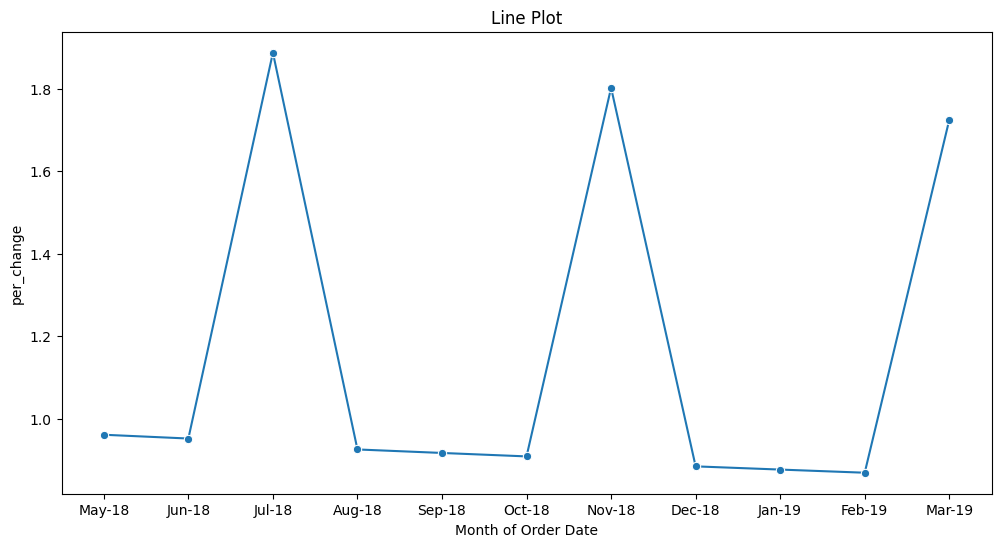

In [153]:
plt.figure(figsize=(12, 6)) 
sns.lineplot(y=f_o2['per_change'], x= f_o2['Month of Order Date'], marker='o')
plt.title("Line Plot")
plt.show()

**q2 final answer**

## 📈 Trend Analysis (Short and Straightforward)

- Target increases are mostly **steady and minor (~0.8% to 1%)**.
- **July-18 (1.88%)**, **Nov-18 (1.80%)**, and **Mar-19 (1.72%)** show **noticeably higher jumps**, indicating **target spikes**.

#
---

## ✅ Suggestion

- Align targets with past trends by **maintaining consistent monthly growth (~1%)**.  
- During spike months, we should **analyze what actions (campaigns, seasonality, etc.) led to the increased targets**, and use those insights to **make informed decisions for future planning**.


# Part 3: Regional Performance Insights

**q1**

In [156]:
o1.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [167]:
final_o.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [172]:
agg_df = final_o.groupby('State').agg(
    total_sales=('Amount', 'sum'),
    avg_profit=('Profit', 'mean'),
    total_orders=('Order ID', 'count')
).reset_index()
agg_df.sort_values(by='total_orders', ascending=False, inplace=True)
agg_df.head()

,State,total_sales,avg_profit,total_orders
10,Madhya Pradesh,105140.0,16.326471,340
11,Maharashtra,95348.0,21.296552,290
4,Gujarat,21058.0,5.344828,87
2,Delhi,22531.0,40.364865,74
14,Rajasthan,21149.0,16.986486,74


In [173]:
agg_df.sort_values(by='total_orders', ascending=True, inplace=True)
agg_df.head()

,State,total_sales,avg_profit,total_orders
15,Sikkim,5276.0,16.708333,24
16,Tamil Nadu,6087.0,-88.640000,25
5,Haryana,8863.0,50.961538,26
6,Himachal Pradesh,8666.0,22.620690,29
0,Andhra Pradesh,13256.0,-11.809524,42


In [174]:
agg_df

,State,total_sales,avg_profit,total_orders
15,Sikkim,5276.0,16.708333,24
16,Tamil Nadu,6087.0,-88.640000,25
5,Haryana,8863.0,50.961538,26
6,Himachal Pradesh,8666.0,22.620690,29
0,Andhra Pradesh,13256.0,-11.809524,42
3,Goa,6705.0,8.604651,43
9,Kerala,13459.0,41.577778,45
12,Nagaland,11903.0,3.288889,45
7,Jammu and Kashmir,10829.0,0.163265,49
8,Karnataka,15058.0,11.944444,54


**q2 answer**

## 📊 Regional Disparities in Sales and Profitability

### 🔼 Top Performing States (High Sales & Profitability)

- **Madhya Pradesh**: Highest total sales (₹105,140) with good average profit (₹16.33).
- **Maharashtra**: Very high sales (₹95,348) and decent profitability (₹21.30).
- **Delhi**: Strong sales (₹22,531) and high profit (₹40.36).
- **Uttar Pradesh** and **West Bengal** also show solid performance across all metrics.
#
---

### 🔽 Underperforming Regions (Low Profit or Negative Profit)

- **Tamil Nadu**: Average profit is **highly negative (-₹88.64)** despite moderate sales — suggests inefficiency or high returns.
- **Andhra Pradesh**, **Punjab**, and **Bihar** also report **negative average profits**, needing urgent review.
- **Nagaland** and **Goa** have **low average profits** despite moderate order volume.
#
---

## 🎯 Recommendations for Improvement

- 📌 **Tamil Nadu**: Prioritize immediate profitability analysis — investigate causes like high discounts, returns, or logistics costs.
- 📌 **Andhra Pradesh, Punjab, Bihar**: Review pricing strategy, product mix, and operational costs to turn profits positive.
- 🔍 **Nagaland & Goa**: Focus on improving profit margins through upselling or cost control.
